<a href="https://colab.research.google.com/github/josesg998/redesn_2024/blob/main/Clase%204/ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.utils import plot_model

In [2]:
# Implementación de YOLO
def yolo_model(input_shape=(416, 416, 3), num_classes=80):
    inputs = Input(shape=input_shape)

    # Bloque 1
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Bloque 2
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Bloque 3
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Bloque 4
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Bloque 5
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Bloque final
    x = layers.Conv2D(1024, (3, 3), padding='same', activation='relu')(x)

    # Salida: detecciones
    x = layers.Conv2D(num_classes, (1, 1), padding='same', activation='sigmoid')(x)

    model = models.Model(inputs, x)
    return model

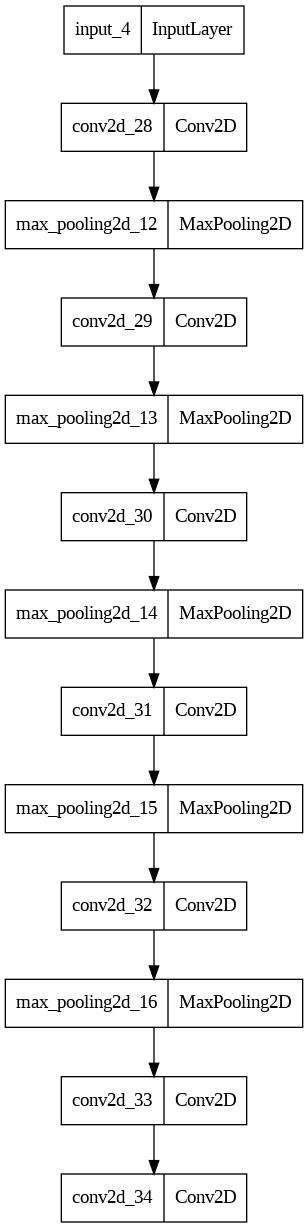

In [6]:
yolo = yolo_model()
plot_model(yolo)

In [3]:
# Implementación de UNet
def unet_model(input_shape=(128, 128, 3), num_classes=1):
    inputs = Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    # Decoder
    u5 = layers.UpSampling2D((2, 2))(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    u6 = layers.UpSampling2D((2, 2))(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.UpSampling2D((2, 2))(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(c7)

    model = models.Model(inputs, outputs)
    return model

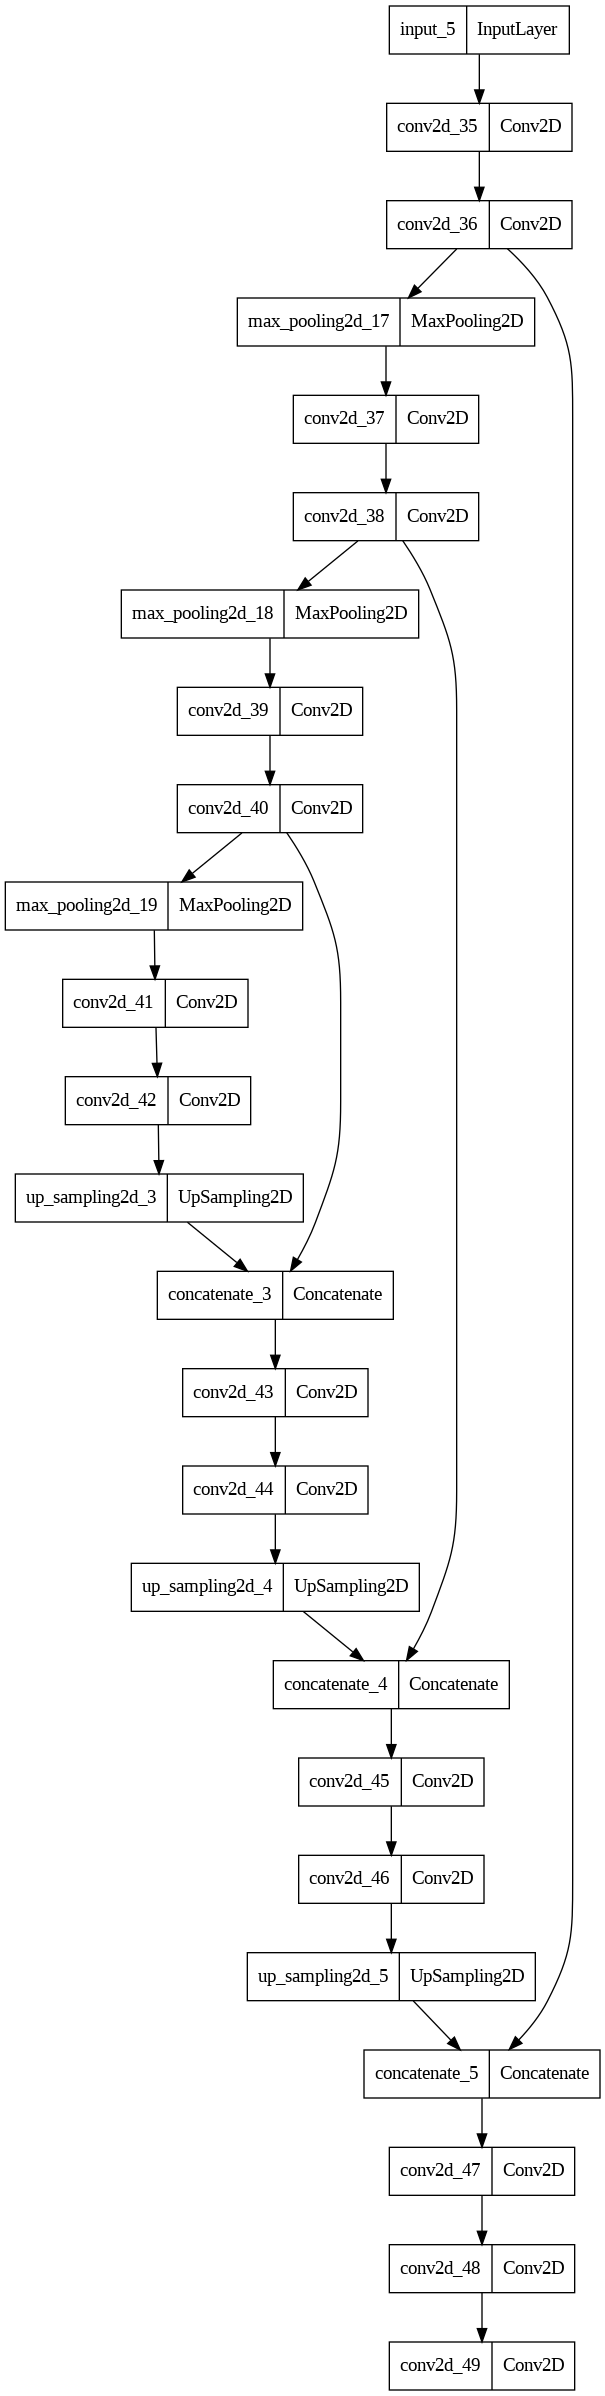

In [7]:
unet = unet_model()
plot_model(unet)

In [5]:
# Implementación de BlazePose
def blaze_pose_model(input_shape=(256, 256, 3), num_keypoints=33):
    inputs = Input(shape=input_shape)

    # Bloque 1
    x = layers.Conv2D(24, (5, 5), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Bloque 2
    x = layers.Conv2D(48, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Bloque 3
    x = layers.Conv2D(96, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Bloque 4
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Bloque 5
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)

    # Regresores de Keypoints
    keypoints = layers.Conv2D(num_keypoints * 2, (1, 1), padding='same')(x)  # Cada keypoint tiene (x, y)

    model = models.Model(inputs, keypoints)
    return model


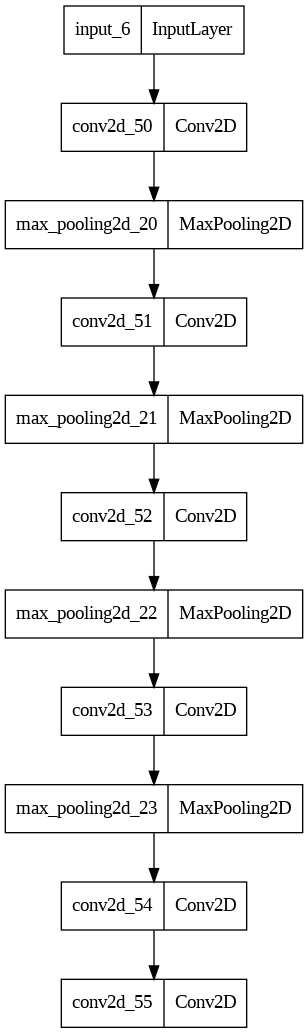

In [8]:
bp_model = blaze_pose_model()
plot_model(bp_model)